In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors, datasets
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline


# Decision Tree Classification




In [38]:

Dp0=pd.read_csv('./data_st/S_MPOS_27_100',delimiter=" ",header=None)
Dn0=pd.read_csv('./data_st/S_MNEG_27_100',delimiter=" ",header=None)

Dp0s=Dp0
Dn0s=Dn0.sample(Dp0s.index.size)
Dn0s=Dn0.sample(2000)


D=pd.concat([Dp0s,Dn0s])
X=D.values
y=np.append(np.zeros([Dp0s.index.size,1]),np.ones([Dn0s.index.size,1]))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [44]:
# we create an instance of Neighbours Classifier and fit the data.
clf = DecisionTreeClassifier(max_depth=4, class_weight='balanced')
#clf = neighbors.RadiusNeighborsClassifier(radius_neighbors, weights=weights)
y_pred = clf.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"% (y_test.shape[0],(y_test != y_pred).sum()))

acc=clf.score(X_test,y_test)
y_pred=clf.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred[:,1], pos_label=1)
auc=metrics.auc(fpr, tpr)

print acc,auc

Number of mislabeled points out of a total 1102 points : 786
0.2867513611615245 0.5350539215686276


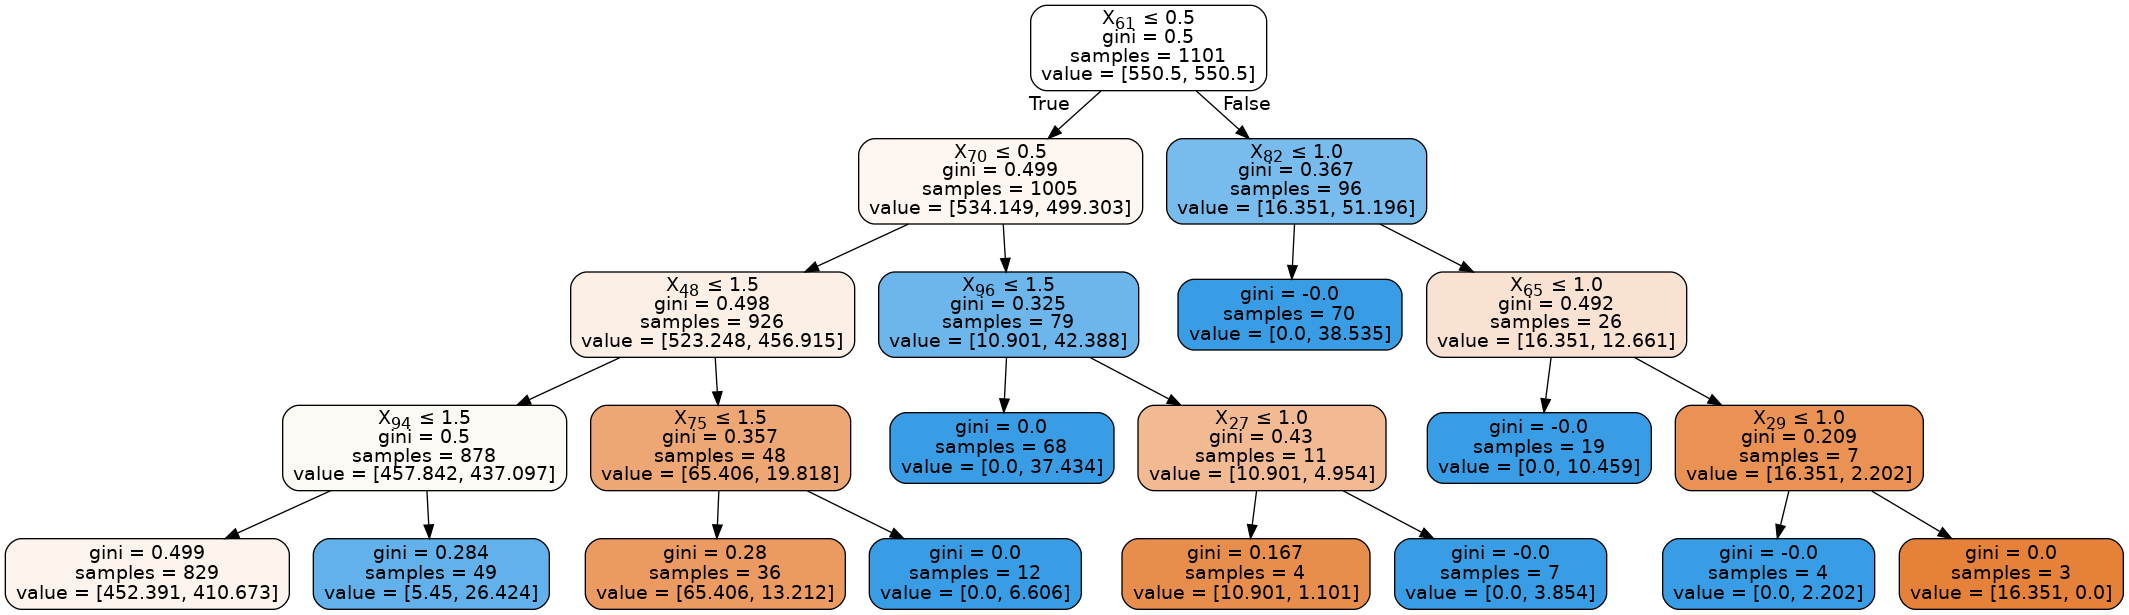

In [45]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())